In [7]:
from moa.frontend import MOAParser
from moa.visualize import visualize_ast
from moa.shape import calculate_shapes
from moa.reduction import reduce_ast

parser = MOAParser()

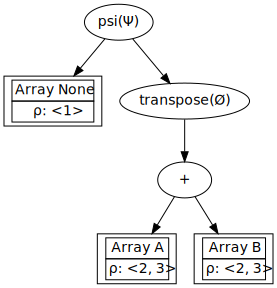

In [8]:
ast = parser.parse('<0> psi (tran(A ^ <2 3> + B ^ <2 3>))')
visualize_ast(ast)

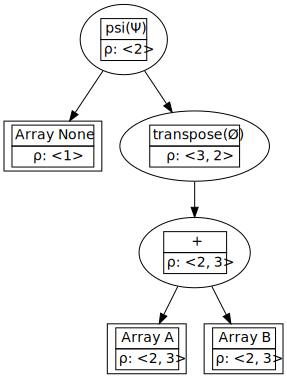

In [9]:
shape_ast = calculate_shapes(ast)
visualize_ast(shape_ast)

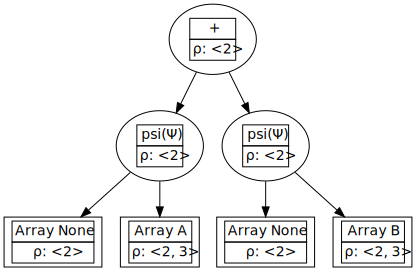

In [10]:
symbol_table, reduced_ast = reduce_ast(shape_ast)
visualize_ast(reduced_ast)